<a href="https://colab.research.google.com/github/sharjeelnawaz8182/demand_prediction_system/blob/main/demand%20prediction%20system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
uploaded = files.upload()


Saving data.csv to data.csv


In [457]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']),encoding="ISO-8859-1",dtype={'CustomerID': str})

In [458]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [459]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [460]:
df.dropna(axis=0,how='any',inplace=True)

In [461]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [462]:
df.drop(labels=['InvoiceNo','Description'],axis=1,inplace=True)

In [463]:
df.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,71053,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,84406B,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,84029G,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,84029E,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [464]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.dayofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

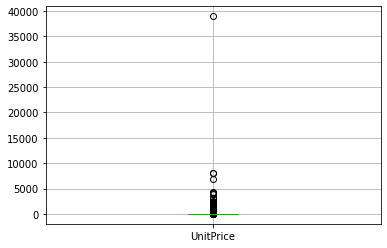

In [465]:
df.boxplot(column='UnitPrice')
df.UnitPrice.describe()


In [466]:
import numpy as np 

In [467]:
tem=np.quantile(df.UnitPrice, 0.9967)
df = df.loc[df.UnitPrice <= tem].copy()
print(tem)

20.8


count    405498.000000
mean         12.096131
std         249.100364
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

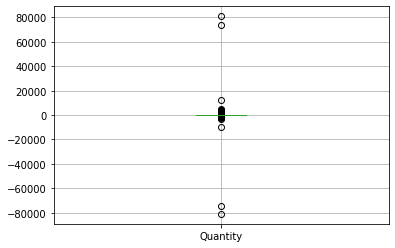

In [468]:
df.boxplot(column='Quantity')
df.Quantity.describe()

In [469]:
temp=np.quantile(df.Quantity, 0.97)

In [470]:
df = df.loc[df.UnitPrice > 0].copy()

In [471]:
df = df.loc[df.Quantity>=1].copy()
df.Quantity.describe()

count    396780.000000
mean         13.018743
std         179.580057
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

count    372348.000000
mean          7.119351
std           6.778948
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max          30.000000
Name: Quantity, dtype: float64

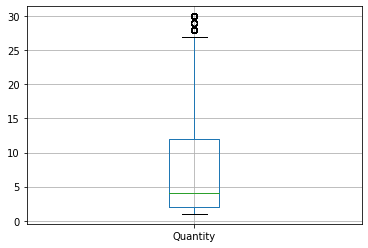

In [472]:
df = df.loc[df.Quantity <=temp].copy()
df.boxplot(column='Quantity')
df.Quantity.describe()

In [473]:
data = pd.DataFrame(df.groupby(["Year","Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode"]).Quantity.sum(),columns=["Quantity"])
data = data.reset_index()
data.head()

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity
0,2010,4,12,48,2,335,1,10002,12
1,2010,4,12,48,2,335,1,10125,2
2,2010,4,12,48,2,335,1,10133,5
3,2010,4,12,48,2,335,1,15044B,1
4,2010,4,12,48,2,335,1,15056BL,20


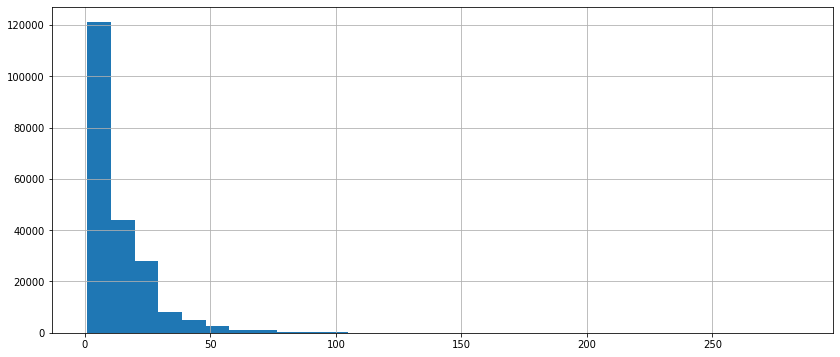

In [474]:
bin_values = np.arange(start=-50, stop=200, step=10)
data['Quantity'].hist(bins=30, figsize=[14,6])

In [475]:
data['Quantity']=np.log(data['Quantity'])

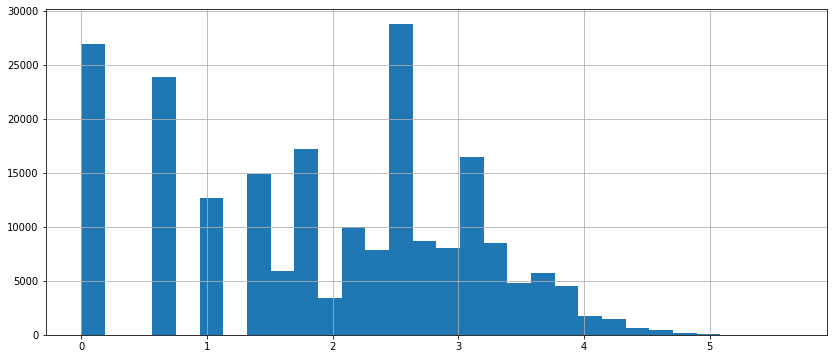

In [476]:
bin_values = np.arange(start=-50, stop=200, step=10)
data['Quantity'].hist(bins=30, figsize=[14,6])

In [477]:
train, test = train_test_split(data, test_size=0.25, shuffle=False)
min=train.Quantity.quantile(0.01)
max=train.Quantity.quantile(0.99)

In [478]:
train=train.loc[(train.Quantity>=min)&(train.Quantity<=max)]

In [479]:
df.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Quarter,Month,Week,Weekday,Day,Dayofyear
0,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,4,12,48,2,1,335
1,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,4,12,48,2,1,335
2,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,4,12,48,2,1,335
3,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,4,12,48,2,1,335
4,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,4,12,48,2,1,335


In [480]:
detail=pd.DataFrame(index=df.StockCode.unique(),columns = ["Median_Price"])

In [481]:
detail["Median_Price"]=df.groupby("StockCode").UnitPrice.median()
detail["median_qauntity"]=df.groupby("StockCode").Quantity.median()
detail["cust_no"]=df.groupby("StockCode").CustomerID.nunique()

In [482]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler=StandardScaler()
X = detail.values
X = scaler.fit_transform(X)
clusters=KMeans(n_clusters=75)
detail["cluster"]=clusters.fit_predict(X)

In [483]:
train["product_type"]=train.StockCode.map(detail.cluster)
test["product_type"]=test.StockCode.map(detail.cluster)
train.product_type=train.product_type.astype("object")
test.product_type=test.product_type.astype("object")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [484]:
train["pre_chris"]=(train.Dayofyear <= 358)&(train.Dayofyear>=243)
test["pre_chris"]=(test.Dayofyear<=358)&(test.Dayofyear>=243)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [485]:
train.head()

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,product_type,pre_chris
0,2010,4,12,48,2,335,1,10002,2.484907,47,True
1,2010,4,12,48,2,335,1,10125,0.693147,29,True
2,2010,4,12,48,2,335,1,10133,1.609438,71,True
3,2010,4,12,48,2,335,1,15044B,0.000000,10,True
4,2010,4,12,48,2,335,1,15056BL,2.995732,62,True


In [486]:
x_train=train.drop(labels='Quantity',axis=1)
y_train=train.Quantity

In [487]:
x_test=test.drop(labels='Quantity',axis=1)
y_test=test.Quantity


In [488]:
pip install catboost

In [489]:
from catboost import CatBoostRegressor,CatBoost

In [490]:
model=CatBoostRegressor()

In [491]:
x_train.head()

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,product_type,pre_chris
0,2010,4,12,48,2,335,1,10002,47,True
1,2010,4,12,48,2,335,1,10125,29,True
2,2010,4,12,48,2,335,1,10133,71,True
3,2010,4,12,48,2,335,1,15044B,10,True
4,2010,4,12,48,2,335,1,15056BL,62,True


In [492]:
y_train.shape

(157941,)

In [493]:
from sklearn.metrics import mean_squared_error

In [494]:
pip install scikit-optimize

In [495]:
from sklearn.model_selection import GridSearchCV
from skopt.space import Real, Categorical,Integer


In [496]:

best_model=CatBoostRegressor()

best_model.fit(X=x_train,y=y_train,cat_features=['StockCode','product_type','pre_chris'])

Learning rate set to 0.096102
0:	learn: 1.0899947	total: 82.6ms	remaining: 1m 22s
1:	learn: 1.0654533	total: 149ms	remaining: 1m 14s
2:	learn: 1.0447493	total: 201ms	remaining: 1m 6s
3:	learn: 1.0274868	total: 274ms	remaining: 1m 8s
4:	learn: 1.0128184	total: 324ms	remaining: 1m 4s
5:	learn: 1.0004981	total: 373ms	remaining: 1m 1s
6:	learn: 0.9905458	total: 423ms	remaining: 60s
7:	learn: 0.9821056	total: 472ms	remaining: 58.5s
8:	learn: 0.9753327	total: 526ms	remaining: 57.9s
9:	learn: 0.9694235	total: 596ms	remaining: 59s
10:	learn: 0.9645932	total: 644ms	remaining: 57.9s
11:	learn: 0.9604307	total: 691ms	remaining: 56.9s
12:	learn: 0.9571488	total: 748ms	remaining: 56.8s
13:	learn: 0.9534113	total: 813ms	remaining: 57.3s
14:	learn: 0.9493802	total: 871ms	remaining: 57.2s
15:	learn: 0.9462277	total: 926ms	remaining: 57s
16:	learn: 0.9435406	total: 969ms	remaining: 56s
17:	learn: 0.9409807	total: 1.03s	remaining: 56.2s
18:	learn: 0.9388524	total: 1.09s	remaining: 56.6s
19:	learn: 0.937

In [497]:
x=best_model.predict(x_test)
best_model.score(x_test,y_test) 

0.3084277587995218

In [498]:
v=mean_squared_error(y_test,x)
print(v)

1.0041481440746565
